<a href="https://colab.research.google.com/github/strathmore-uni/MallCustomers-Clustering./blob/main/Mall_Customers_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# show all columns
pd.set_option('display.max_columns', None)

from google.colab import files
uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])
df.head()


Saving Mall_Customers.csv to Mall_Customers (1).csv


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:

print(df.info())
print("\nMissing values:\n", df.isnull().sum())

# Rename columns for convenience
df.columns = ['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore']

# Drop duplicates if any
df = df.drop_duplicates()
print("\nDataset shape after cleaning:", df.shape)

df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Dataset shape after cleaning: (200, 5)


,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:

X = df[['AnnualIncome', 'SpendingScore']].values

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


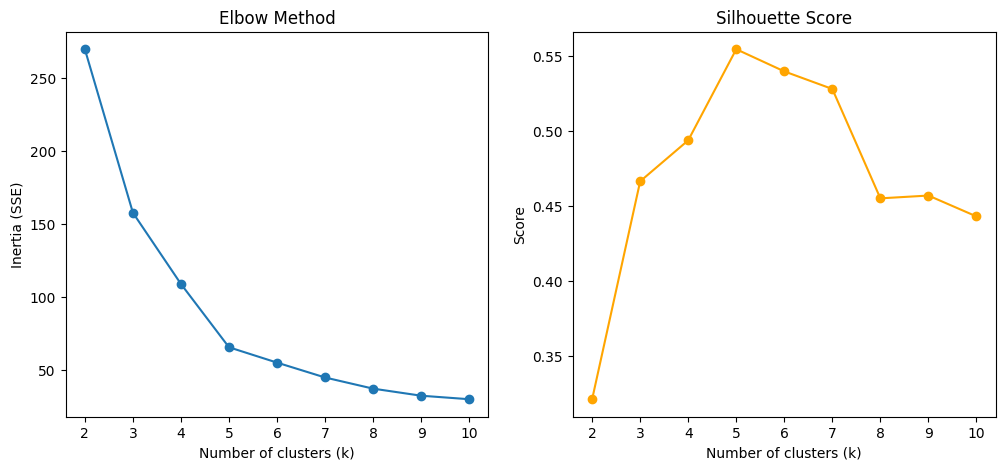

In [4]:

inertia = []
silhouette = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, labels))

# Plot elbow and silhouette
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (SSE)')

plt.subplot(1,2,2)
plt.plot(K_range, silhouette, marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Score')

plt.show()


In [5]:

optimal_k = 5

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Add cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)

print("Cluster centers (Annual Income, Spending Score):\n")
print(pd.DataFrame(centers, columns=['AnnualIncome', 'SpendingScore']))


Cluster centers (Annual Income, Spending Score):

   AnnualIncome  SpendingScore
0     55.296296      49.518519
1     86.538462      82.128205
2     25.727273      79.363636
3     88.200000      17.114286
4     26.304348      20.913043


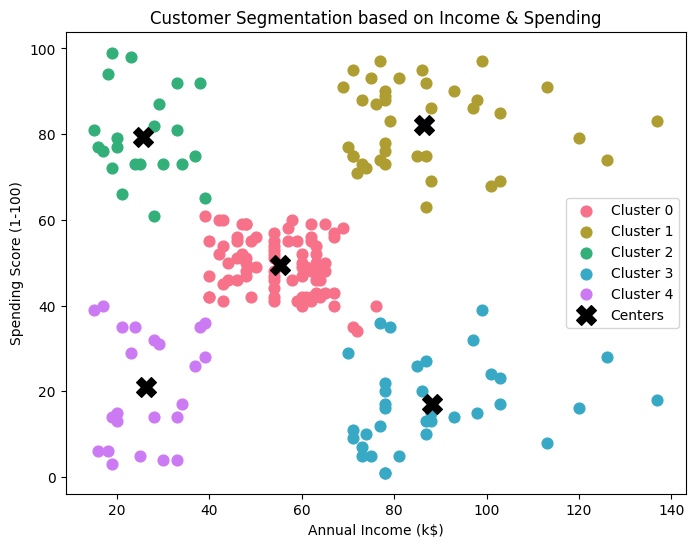

In [6]:

plt.figure(figsize=(8,6))
palette = sns.color_palette("husl", optimal_k)
for i in range(optimal_k):
    cluster = df[df['Cluster'] == i]
    plt.scatter(cluster['AnnualIncome'], cluster['SpendingScore'],
                s=60, color=palette[i], label=f'Cluster {i}')

# plot centers
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, marker='X', label='Centers')
plt.title('Customer Segmentation based on Income & Spending')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [7]:

summary = df.groupby('Cluster').agg(
    Count=('CustomerID','count'),
    Mean_Age=('Age','mean'),
    Mean_Income=('AnnualIncome','mean'),
    Mean_Spending=('SpendingScore','mean')
).round(1).sort_values('Mean_Income')

summary


,Count,Mean_Age,Mean_Income,Mean_Spending
Cluster,,,,
2,22,25.3,25.7,79.4
4,23,45.2,26.3,20.9
0,81,42.7,55.3,49.5
1,39,32.7,86.5,82.1
3,35,41.1,88.2,17.1


In [8]:

recommendations = {
    'Cluster Description': [
        'Low Income, Low Spending',
        'High Income, Low Spending',
        'Medium Income, Medium Spending',
        'High Income, High Spending',
        'Low Income, High Spending'
    ],
    'Customer Profile': [
        'Budget-conscious, infrequent shoppers',
        'Wealthy but cautious spenders',
        'Middle class with average engagement',
        'Premium, loyal, high-value shoppers',
        'Young impulsive or trend-driven customers'
    ],
    'Mall Engagement Strategy': [
        'Run discount events, flash sales, and family promotions to increase visits.',
        'Offer personalized luxury deals and loyalty incentives to encourage spending.',
        'Use loyalty programs, cashbacks, and entertainment events to boost engagement.',
        'Provide VIP treatment, priority services, and early access to new collections.',
        'Leverage social media, student offers, and trendy pop-ups to sustain excitement.'
    ]
}

strategy_df = pd.DataFrame(recommendations)
strategy_df


,Cluster Description,Customer Profile,Mall Engagement Strategy
0,"Low Income, Low Spending","Budget-conscious, infrequent shoppers","Run discount events, flash sales, and family p..."
1,"High Income, Low Spending",Wealthy but cautious spenders,Offer personalized luxury deals and loyalty in...
2,"Medium Income, Medium Spending",Middle class with average engagement,"Use loyalty programs, cashbacks, and entertain..."
3,"High Income, High Spending","Premium, loyal, high-value shoppers","Provide VIP treatment, priority services, and ..."
4,"Low Income, High Spending",Young impulsive or trend-driven customers,"Leverage social media, student offers, and tre..."
